# Aplicação do método AHP Gaussiano para tomada de decisão de qual carro comprar

A seguinte aplicação tem fins teóricos.

Aqui, o objetivo é comprar um carro.

As alternativas que utilizarei na aplicação:

- CITROEN C3 1.0 TURBO 200 FLEX YOU CVT

- FIAT PULSE 1.3 FLEX DRIVE CVT

- VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO

Os critérios que utilizarei na aplicação:

- Preço

- Consumo de etanol na estrada

- Consumo de etanol na cidade

- Capacidade do tanque de combustível

- Capacidade do porta malas

## Importando as bibliotecas

In [1]:
import pandas as pd

## Importando a base de dados

Essa base de dados foi construída a partir de um web scraping da página de comparação de veículos da Webmotors. O código está disponível em web_scraping/run.py

In [2]:
df = pd.read_csv('../data/vehicles_infos.csv').sort_values('brand')
df

,brand,model,version,price,doors,seats,transmission,fuel,city_consumption_e,road_consumption_e,city_consumption_g,road_consumption_g,fuel_tank_capacity,car_trunk_capacity
2,CITROEN,C3,1.0 TURBO 200 FLEX YOU CVT,106990,4,5,CVT,Gasolina e álcool,7.9,8.8,11.5,12.9,47.0,315.0
0,FIAT,PULSE,1.3 FLEX DRIVE CVT,112990,4,5,CVT,Gasolina e álcool,8.9,10.5,13.0,14.7,47.0,370.0
1,VOLKSWAGEN,T-CROSS,1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,119990,4,5,Automática,Gasolina e álcool,7.6,9.5,11.0,13.5,49.0,373.0


## Algumas transformações e verificações

In [3]:
df['vehicle'] = df.apply(lambda x: x['brand'] + ' ' + x['model'] + ' ' + x['version'], axis=1)
df

,brand,model,version,price,doors,seats,transmission,fuel,city_consumption_e,road_consumption_e,city_consumption_g,road_consumption_g,fuel_tank_capacity,car_trunk_capacity,vehicle
2,CITROEN,C3,1.0 TURBO 200 FLEX YOU CVT,106990,4,5,CVT,Gasolina e álcool,7.9,8.8,11.5,12.9,47.0,315.0,CITROEN C3 1.0 TURBO 200 FLEX YOU CVT
0,FIAT,PULSE,1.3 FLEX DRIVE CVT,112990,4,5,CVT,Gasolina e álcool,8.9,10.5,13.0,14.7,47.0,370.0,FIAT PULSE 1.3 FLEX DRIVE CVT
1,VOLKSWAGEN,T-CROSS,1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,119990,4,5,Automática,Gasolina e álcool,7.6,9.5,11.0,13.5,49.0,373.0,VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENS...


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3 entries, 2 to 1
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   brand               3 non-null      object 
 1   model               3 non-null      object 
 2   version             3 non-null      object 
 3   price               3 non-null      int64  
 4   doors               3 non-null      int64  
 5   seats               3 non-null      int64  
 6   transmission        3 non-null      object 
 7   fuel                3 non-null      object 
 8   city_consumption_e  3 non-null      float64
 9   road_consumption_e  3 non-null      float64
 10  city_consumption_g  3 non-null      float64
 11  road_consumption_g  3 non-null      float64
 12  fuel_tank_capacity  3 non-null      float64
 13  car_trunk_capacity  3 non-null      float64
 14  vehicle             3 non-null      object 
dtypes: float64(6), int64(3), object(6)
memory usage: 384.0+ bytes


## Aplicação do método AHP Gaussiano

As etapas do método AHP Gaussiano estão representadas pela seguinte figura tirada de https://www.researchgate.net/publication/355078232_Avaliacao_de_aquisicoes_hospitalares_a_partir_do_metodo_multicriterio_AHP-GAUSSIANO, que, por sua vez, tirou de https://www.researchgate.net/publication/351724214_Multicriteria_Decision-Making_In_The_Selection_Of_Warships_A_New_Approach_To_The_Ahp_Method:

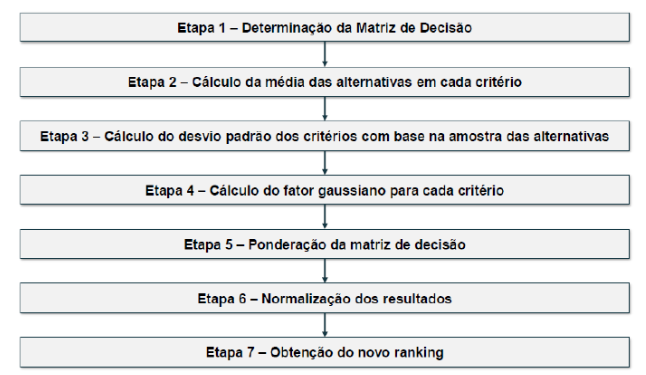

### Etapa 1 - Determinação da matriz de decisão

#### Definindo as colunas que usarei como critérios e fazendo a coluna vehicle de índice.

In [5]:
decision_matrix = df[['price', 'city_consumption_e', 'road_consumption_e', 'fuel_tank_capacity', 'car_trunk_capacity', 'vehicle']].set_index('vehicle')
decision_matrix

,price,city_consumption_e,road_consumption_e,fuel_tank_capacity,car_trunk_capacity
vehicle,,,,,
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT,106990,7.9,8.8,47.0,315.0
FIAT PULSE 1.3 FLEX DRIVE CVT,112990,8.9,10.5,47.0,370.0
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,119990,7.6,9.5,49.0,373.0


O preço é monotônico de custo, ou seja, quanto menor, melhor!

O consumo de etanol na cidade é monotônico de lucro, ou seja, quanto maior, melhor!

O consumo de etanol na estrada é monotônico de lucro, ou seja, quanto maior, melhor!

A capacidade do tanque de combustível é monotônico de lucro, ou seja, quanto maior, melhor!

A capacidade do porta malas é monotônico de lucro, ou seja, quanto maior, melhor!

**Vamos usar isso para normalizar a matrix de decisão**

#### Normalizar a matriz de decisão

In [6]:
decision_matrix_n = decision_matrix.copy()

decision_matrix_n['price'] = decision_matrix_n['price'].apply(lambda x: (1/x))
decision_matrix_n_sum = decision_matrix_n.sum()
decision_matrix_n_sum

price                    0.000027
city_consumption_e      24.400000
road_consumption_e      28.800000
fuel_tank_capacity     143.000000
car_trunk_capacity    1058.000000
dtype: float64

In [7]:
for col in decision_matrix_n.columns:
    decision_matrix_n[col] = decision_matrix_n[col].apply(lambda x: x/decision_matrix_n_sum[col])

decision_matrix_n

,price,city_consumption_e,road_consumption_e,fuel_tank_capacity,car_trunk_capacity
vehicle,,,,,
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT,0.352292,0.323770,0.305556,0.328671,0.297732
FIAT PULSE 1.3 FLEX DRIVE CVT,0.333584,0.364754,0.364583,0.328671,0.349716
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,0.314124,0.311475,0.329861,0.342657,0.352552


### Etapa 2 - Cálculo da média das alternativas em cada critério

In [8]:
decision_matrix_n_transpose = decision_matrix_n.T
decision_matrix_n_transpose

vehicle,CITROEN C3 1.0 TURBO 200 FLEX YOU CVT,FIAT PULSE 1.3 FLEX DRIVE CVT,VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO
price,0.352292,0.333584,0.314124
city_consumption_e,0.323770,0.364754,0.311475
road_consumption_e,0.305556,0.364583,0.329861
fuel_tank_capacity,0.328671,0.328671,0.342657
car_trunk_capacity,0.297732,0.349716,0.352552


In [9]:
means = decision_matrix_n_transpose.mean(axis=1)
means

price                 0.333333
city_consumption_e    0.333333
road_consumption_e    0.333333
fuel_tank_capacity    0.333333
car_trunk_capacity    0.333333
dtype: float64

### Etapa 3 - Cálculo do desvio padrão dos critérios com base na amostra das alternativas

In [10]:
stds = decision_matrix_n_transpose.std(axis=1)
stds

price                 0.019085
city_consumption_e    0.027897
road_consumption_e    0.029667
fuel_tank_capacity    0.008075
car_trunk_capacity    0.030865
dtype: float64

### Etapa 4 - Cálculo do fator gaussiano para cada critério

O fator gaussiano é calculado como desvio_padrão/media

In [11]:
gaussian = stds/means
gaussian

price                 0.057256
city_consumption_e    0.083691
road_consumption_e    0.089000
fuel_tank_capacity    0.024224
car_trunk_capacity    0.092594
dtype: float64

Normalizando o fator gaussiano

In [12]:
gaussian_n = gaussian/gaussian.sum()
gaussian_n

price                 0.165114
city_consumption_e    0.241347
road_consumption_e    0.256658
fuel_tank_capacity    0.069858
car_trunk_capacity    0.267022
dtype: float64

### Etapa 5 - Ponderação da matriz de decisão

In [13]:
decision_matrix_n

,price,city_consumption_e,road_consumption_e,fuel_tank_capacity,car_trunk_capacity
vehicle,,,,,
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT,0.352292,0.323770,0.305556,0.328671,0.297732
FIAT PULSE 1.3 FLEX DRIVE CVT,0.333584,0.364754,0.364583,0.328671,0.349716
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,0.314124,0.311475,0.329861,0.342657,0.352552


In [14]:
pond_gaussian_matrix_n = decision_matrix_n*gaussian_n
pond_gaussian_matrix_n

,price,city_consumption_e,road_consumption_e,fuel_tank_capacity,car_trunk_capacity
vehicle,,,,,
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT,0.058168,0.078141,0.078423,0.022960,0.079501
FIAT PULSE 1.3 FLEX DRIVE CVT,0.055080,0.088032,0.093573,0.022960,0.093382
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO,0.051866,0.075174,0.084661,0.023938,0.094139


### Etapa 6 - Normalização dos resultados

In [15]:
norm_pond_gaussian_matrix_n = pond_gaussian_matrix_n.sum(axis=1)
norm_pond_gaussian_matrix_n


vehicle
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT                         0.317194
FIAT PULSE 1.3 FLEX DRIVE CVT                                 0.353028
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO    0.329778
dtype: float64

### Etapa 7 - Obtenção do ranking

In [16]:
ranking = norm_pond_gaussian_matrix_n.sort_values(ascending=False)
ranking

vehicle
FIAT PULSE 1.3 FLEX DRIVE CVT                                 0.353028
VOLKSWAGEN T-CROSS 1.0 200 TSI TOTAL FLEX SENSE AUTOMÁTICO    0.329778
CITROEN C3 1.0 TURBO 200 FLEX YOU CVT                         0.317194
dtype: float64

Portanto, considerando essas alternativas (Pulse, T-Cross e C3) e alguns critérios, em primeiro lugar deveria escolher o Pulse, em segundo o T-Cross e, por último, o C3.